# <font color='CC3D3D'> IsolationForest
    
### 1. IsolationForest
- <span style="color:green">**X_train.csv, X_public.csv, X_private.csv, X_test.csv** </span>를 가지고 IsolationForest를 x통해 이상치 탐지 진행
    
### 2. Deployment PKL
- <span style="color:blue">**Isolationforest_base_1012.pkl** </span>를 생성

# Import

In [1]:
import pandas as pd
import numpy as np

from sklearn.preprocessing import LabelEncoder

from sklearn.ensemble import IsolationForest
from sklearn.metrics import f1_score
from sklearn.metrics import classification_report

import matplotlib.pyplot as plt
import joblib

import warnings
warnings.filterwarnings(action='ignore')

# Data Load

In [2]:
train = pd.read_csv('../Data/master_train_data.csv')
public = pd.read_csv('../Data/master_public_data.csv')
private = pd.read_csv('../Data/master_private_data.csv')
test = pd.read_csv('../Data/master_test_data.csv')

# EDA

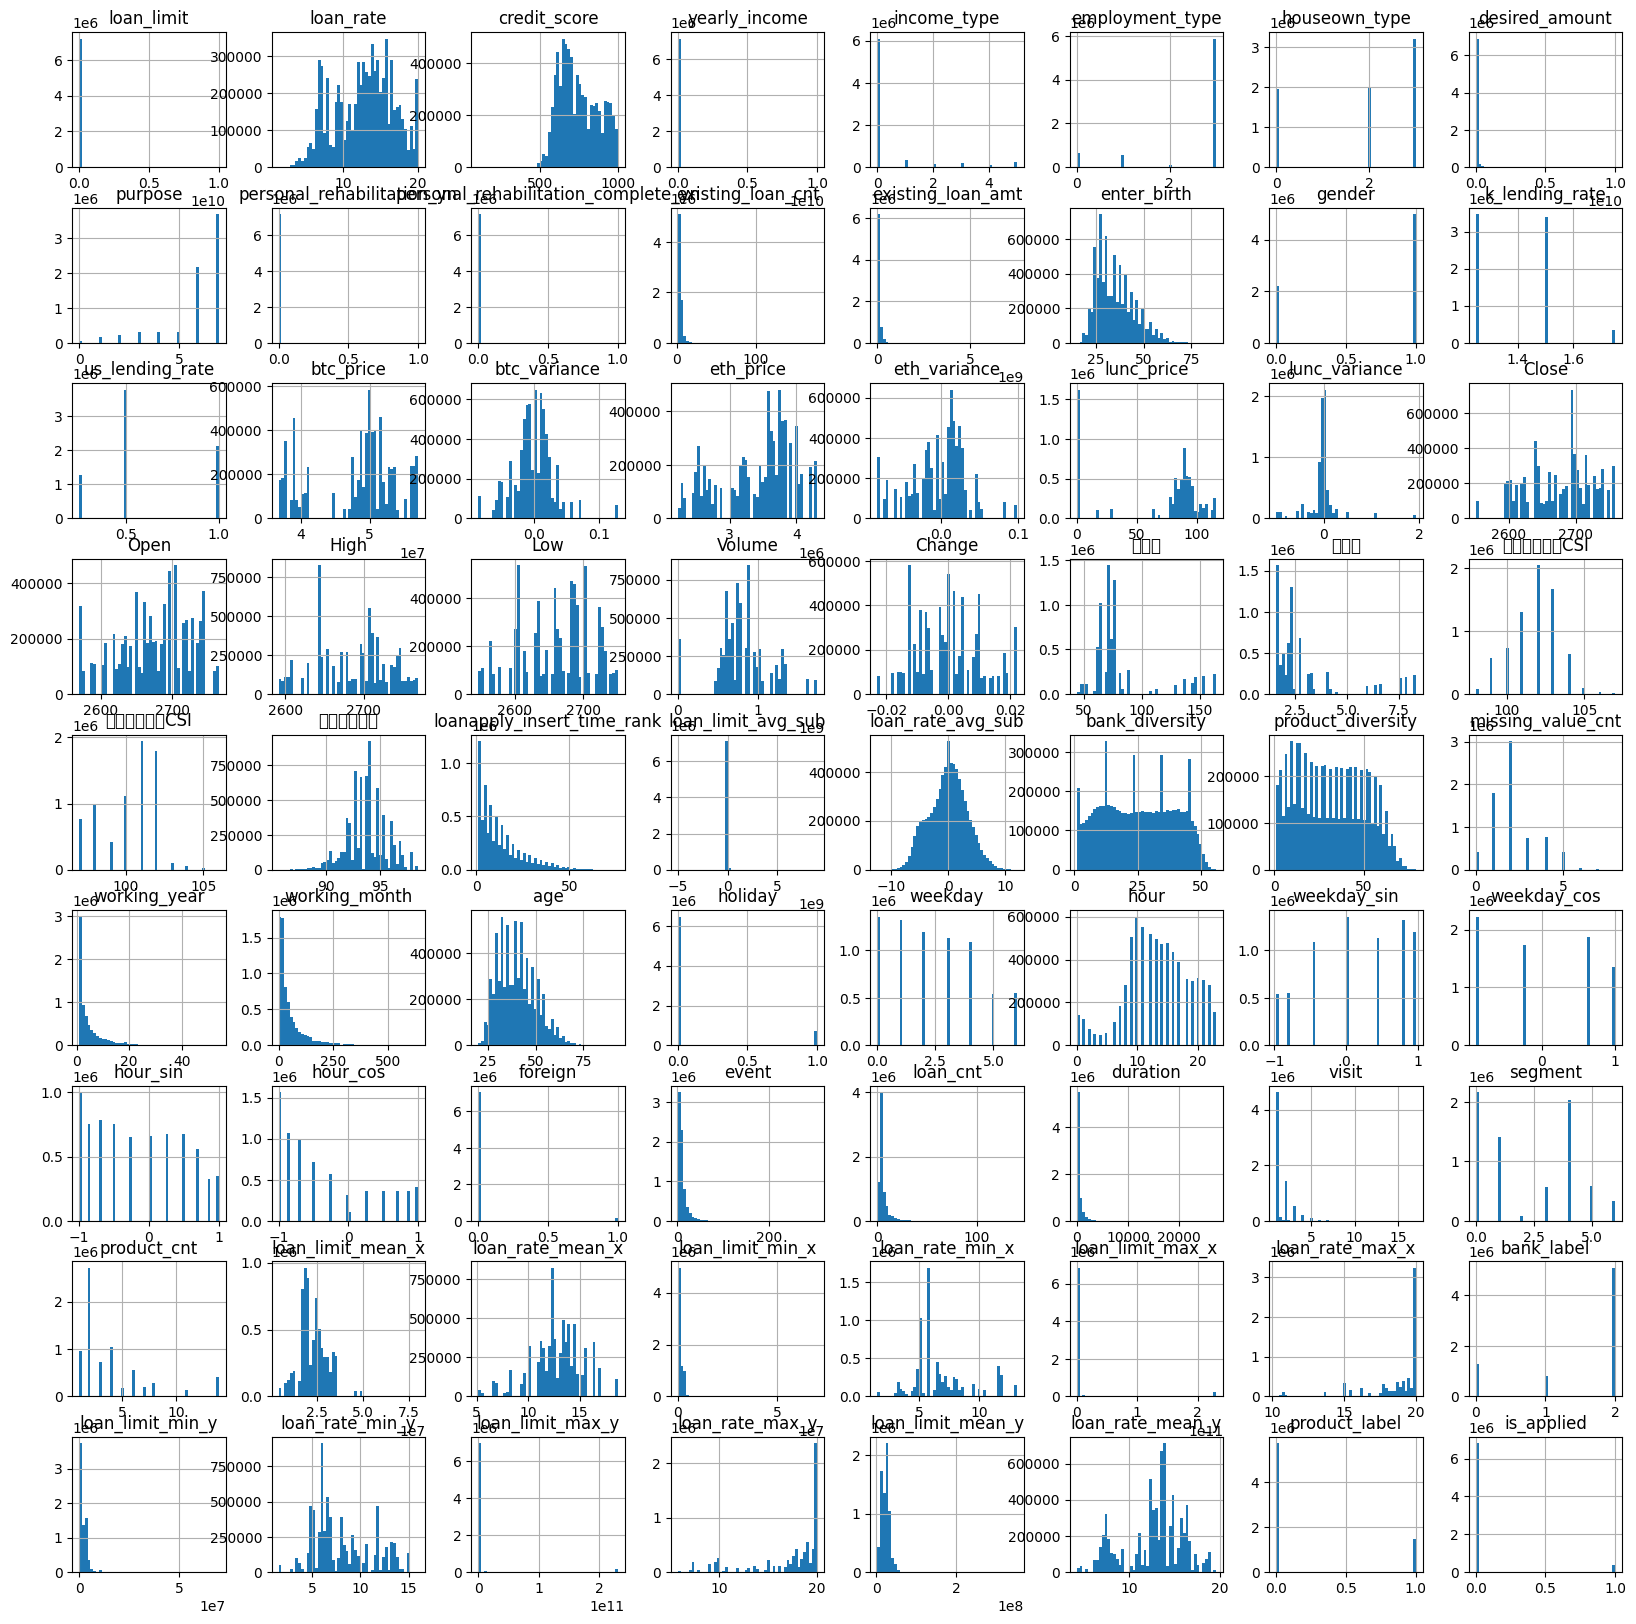

In [3]:
train.hist(bins = 50, figsize = (20,20))
plt.show()

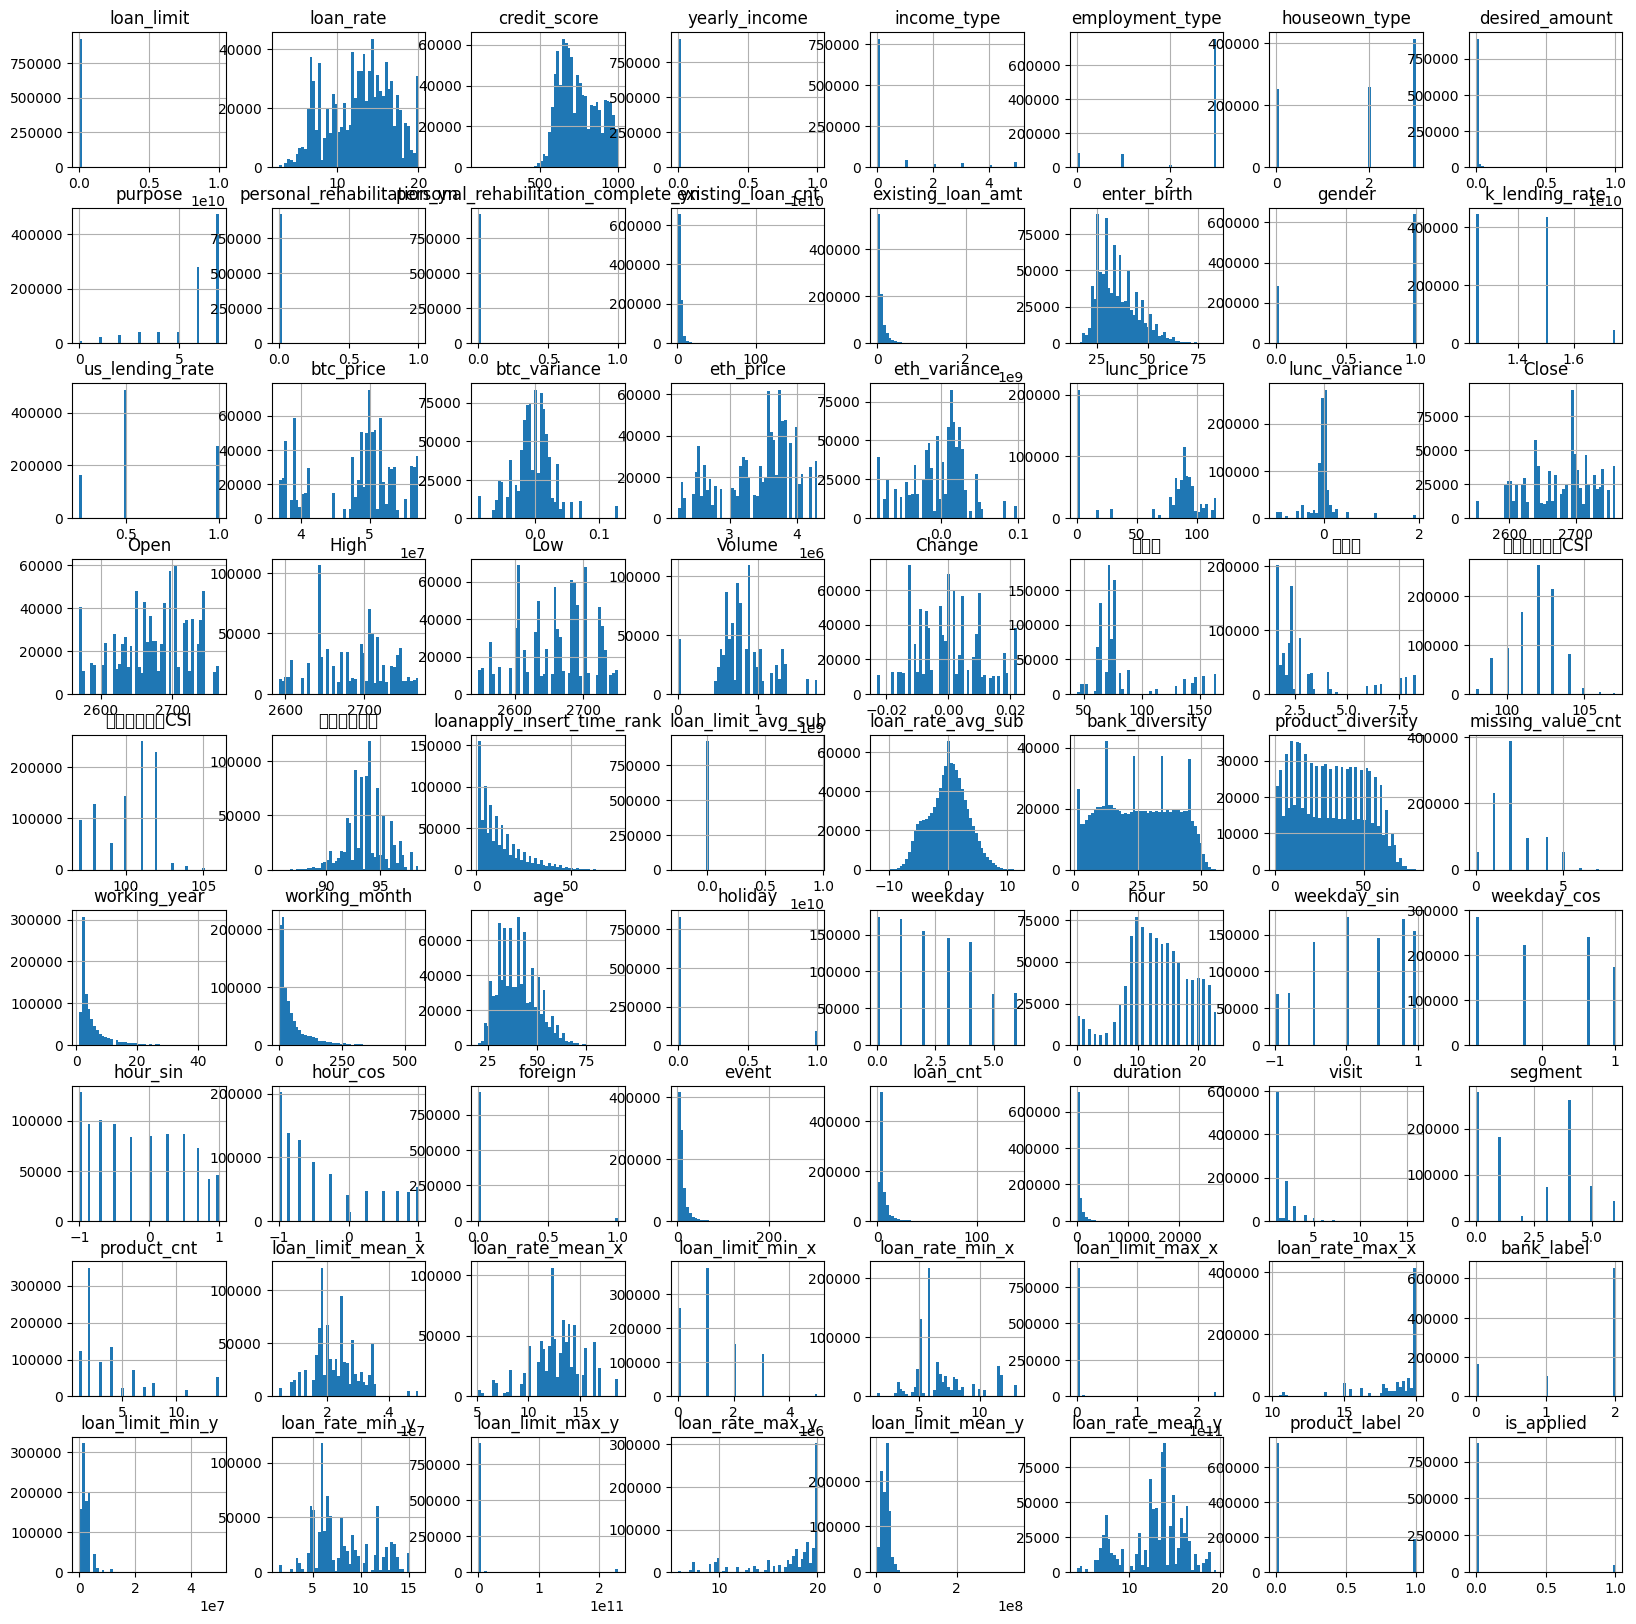

In [4]:
public.hist(bins = 50, figsize = (20,20))
plt.show()

In [5]:
val_normal, val_fraud = public['is_applied'].value_counts()
val_contamination = val_fraud / val_normal
print(f'Validation contamination : [{val_contamination}]')

Validation contamination : [0.05770874648546524]


# Model Define & Fit

In [6]:
# Train dataset은 Label이 존재하지 않음
train_x = train.drop(columns=['is_applied']) # Input Data

In [7]:
model = IsolationForest(n_estimators=125, max_samples='auto', contamination=0.05,#val_contamination, 
                        random_state=42, n_jobs=-1,verbose=0,max_features=2)
model.fit(train_x)

IsolationForest(contamination=0.05, max_features=2, n_estimators=125, n_jobs=-1,
                random_state=42)

# Evaluation

In [8]:
def get_pred_label(model_pred):
    # IsolationForest 모델 출력 (1:정상, -1:불량(사기)) 이므로 (0:정상, 1:불량(사기))로 Label 변환
    model_pred = np.where(model_pred == 1, 0, model_pred)
    model_pred = np.where(model_pred == -1, 1, model_pred)
    return model_pred

In [9]:
val_x = public.drop(columns=['is_applied']) # Input Data
val_y = public['is_applied'] # Label

val_pred = model.predict(val_x) # model prediction
val_pred = get_pred_label(val_pred)
val_score = f1_score(val_y, val_pred)#, average='macro'
print(f'Validation F1 Score : [{val_score}]')
print(classification_report(val_y, val_pred))

Validation F1 Score : [0.08172216532704384]
              precision    recall  f1-score   support

         0.0       0.95      0.95      0.95    873871
         1.0       0.09      0.08      0.08     50430

    accuracy                           0.90    924301
   macro avg       0.52      0.51      0.52    924301
weighted avg       0.90      0.90      0.90    924301



# Model save

In [10]:
joblib.dump(model, '../Models/Isolationforest_base_1012.pkl')

['../Models/Isolationforest_base_1012.pkl']